## combine ##

In [3]:
from PIL import Image
import pytesseract
import json
import os

# === Thư mục chứa ảnh và nơi lưu JSON ===
INPUT_FOLDER = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/converted_pngs"
OUTPUT_FOLDER = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT"

# Tạo thư mục output nếu chưa có
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Lặp qua tất cả file PNG trong thư mục đầu vào
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith(".png"):
        image_path = os.path.join(INPUT_FOLDER, filename)
        base_name = os.path.splitext(filename)[0]
        output_json = os.path.join(OUTPUT_FOLDER, base_name + ".json")

        print(f"🔍 pytesseract OCR: đang xử lý {filename}")

        try:
            img = Image.open(image_path)
            data = pytesseract.image_to_data(img, lang='vie', output_type=pytesseract.Output.DICT)

            tokens = []
            n = len(data['level'])
            for i in range(n):
                word = data['text'][i].strip()
                if word == '':
                    continue
                x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                tokens.append({
                    "text": word,
                    "bbox": [x, y, x + w, y + h]
                })

            with open(output_json, "w", encoding="utf-8") as f:
                json.dump(tokens, f, ensure_ascii=False, indent=2)

            print(f"✅ Đã lưu: {output_json}")
        except Exception as e:
            print(f"❌ Lỗi với {filename}: {e}")


🔍 pytesseract OCR: đang xử lý 1C23TTN_00000332.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT/1C23TTN_00000332.json
🔍 pytesseract OCR: đang xử lý 1C23TYY_00000007.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT/1C23TYY_00000007.json
🔍 pytesseract OCR: đang xử lý 1C23TYY_00000010.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT/1C23TYY_00000010.json
🔍 pytesseract OCR: đang xử lý 1C23TYY_00000014.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT/1C23TYY_00000014.json
🔍 pytesseract OCR: đang xử lý 1C23TYY_00000015.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/pytesseract_OUTPUT/1C23TYY_00000015.json
🔍 pytesseract OCR: đang xử lý 1C23TYY_00000020.png
✅ Đã lưu: /mnt/c/Users/Legion/Documents/jimmy tran/Aut

✅ pytesseract: Đã OCR và lưu kết quả vào /mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/easyOCR_OUTPUT/1C23TTN_00000332.json


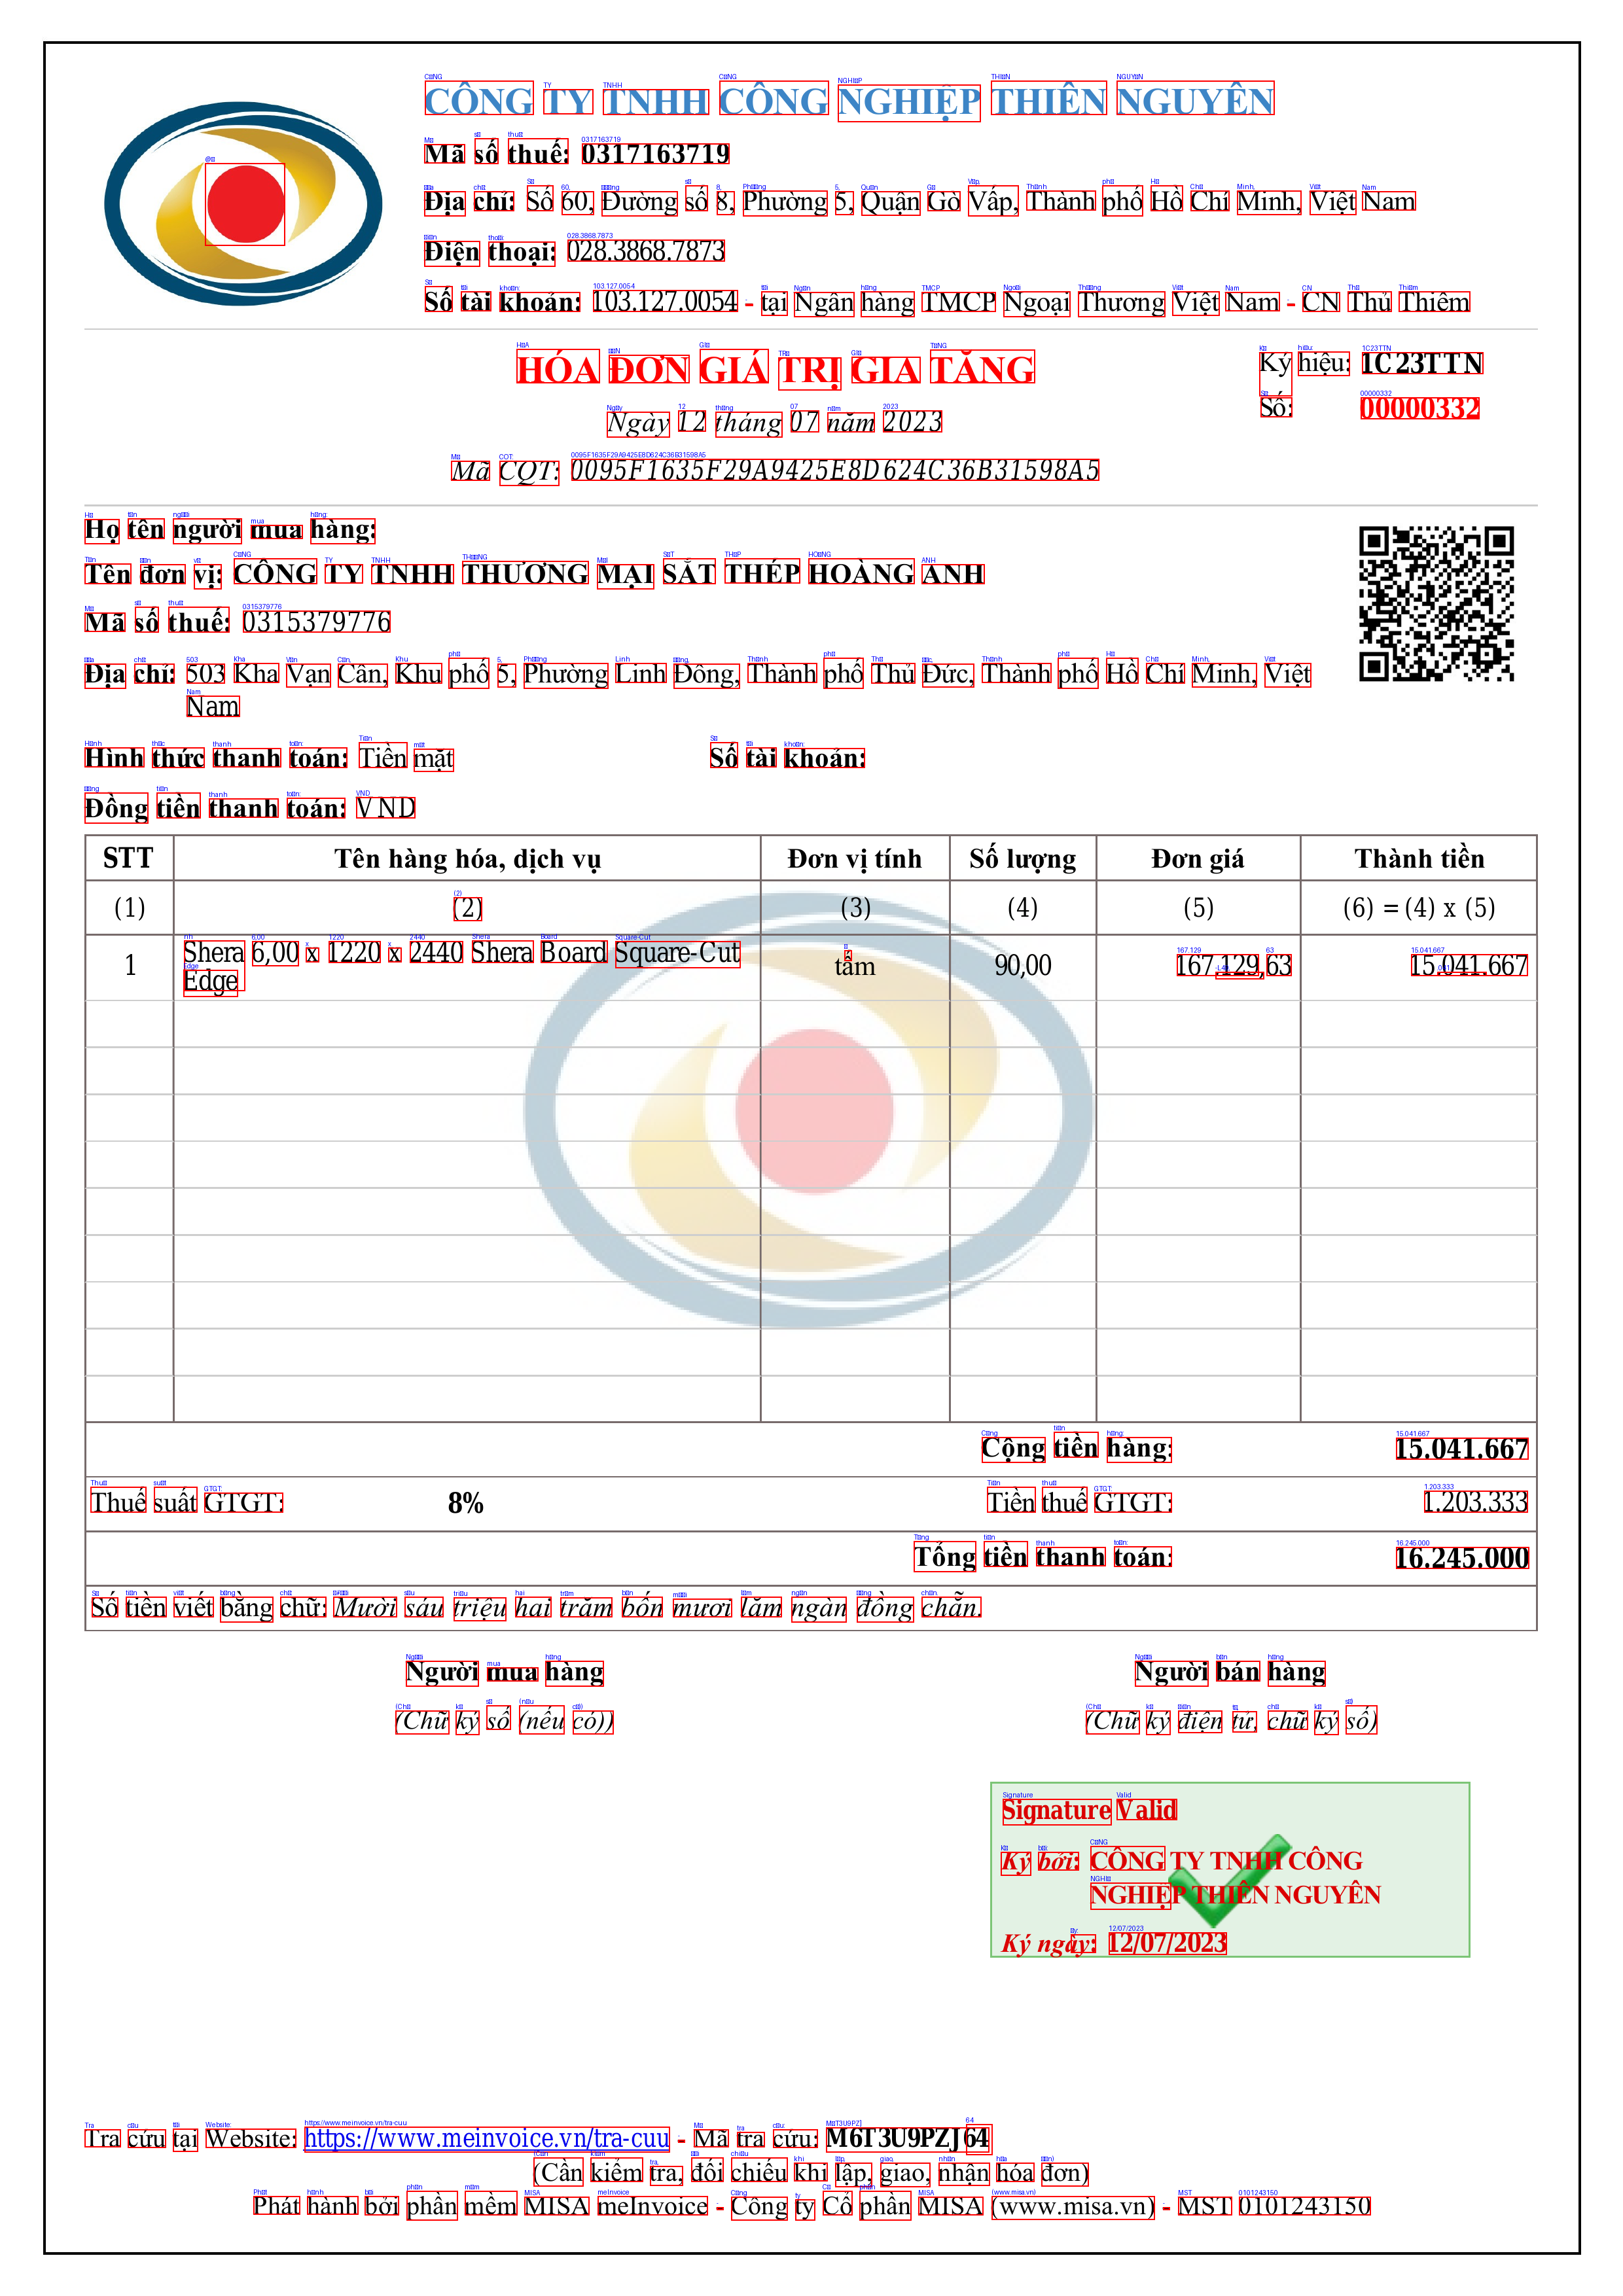

In [6]:
from PIL import Image, ImageDraw, ImageFont
import json

# File ảnh và OCR output (bạn đổi qua pytesseract hoặc easyocr tùy ý)
IMAGE_PATH = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/converted_pngs/1C23TTN_00000332.png"
OCR_JSON= "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/Pytesseract_OUTPUT/1C23TTN_00000332.json"

# Mở ảnh gốc
img = Image.open(IMAGE_PATH)
draw = ImageDraw.Draw(img)

# Load kết quả OCR
with open(OCR_JSON, "r", encoding="utf-8") as f:
    tokens = json.load(f)

# Vẽ bbox và text lên ảnh
for token in tokens:
    bbox = token["bbox"]
    text = token["text"]
    draw.rectangle(bbox, outline="red", width=2)
    draw.text((bbox[0], bbox[1] - 12), text, fill="blue")

# Hiển thị ảnh (trong Jupyter hoặc lưu ra file)
img.show()  # hoặc img.save("visualized_output.png")
